# Project Name:-Loan Prediction Machine Learning Project

## Introduction:

#### In finance, a loan is the lending of money by one or more individuals, organizations, or other entities to other individuals, organizations etc. The recipient (i.e., the borrower) incurs a debt and is usually liable to pay interest on that debt until it is repaid as well as to repay the principal amount borrowed.

The major aim of this notebook is to predict which of the customers will have their loan approved

## Data information
This dataset is named Loan Prediction Dataset data set. The dataset contains a set of 613 records under 13 attributes:

### The main objective for this dataset:
Using machine learning techniques to predict loan payments

#### target value: Loan_Status

### The data consists of the following rows:



In [92]:
# import all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [93]:
# it will display all the columns

pd.pandas.set_option('display.max_columns',None)

In [94]:
# read the file

df= pd.read_csv("loan _prediction_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [95]:
# top 5 records

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [96]:
# print shape of dataset with rows adn columns

df.shape

(614, 13)

In [97]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### 367 entries or rows and 12 columns Gender,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History have null values. dtypes are float64 are (3)(LoanAmount,Loan_Amount_Term,Credit_History), int64=(2) are (coapplicantIncome,applicantIncome, object are (7)(Gender,Dependents,married,education,Loan ID,Self_Employed)

In [98]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1)ApplicantIncome,CoapplicantIncome,LoanAmount is positively skewed.
2)Loan_Amount_Term,Credit_History are negatively skewed.

In [99]:
#checking value count because the column values are numeric type but showing object
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [100]:
df["Dependents"].replace('3+',3,inplace=True)

In [101]:
df["Dependents"].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [102]:
df['Dependents']=df['Dependents'].astype('float')
df['Dependents'].dtype

dtype('float64')

In [103]:
#checking the missing value
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### columns and sum of their null values: Gender= 11 Dependents= 10 Self_Employed = 23 LoanAmount=5 Loan_Amount_Term= 6 Credit_History=29

### Treating null values
Checking the percentage of null values in a column

In [104]:
# here we will check the percentage of null/missing values in each feature
for i in df.columns:
    print(f'{i}  = {round(df[i].isnull().sum()/len(df)*100,2)} % missing values')

Loan_ID  = 0.0 % missing values
Gender  = 2.12 % missing values
Married  = 0.49 % missing values
Dependents  = 2.44 % missing values
Education  = 0.0 % missing values
Self_Employed  = 5.21 % missing values
ApplicantIncome  = 0.0 % missing values
CoapplicantIncome  = 0.0 % missing values
LoanAmount  = 3.58 % missing values
Loan_Amount_Term  = 2.28 % missing values
Credit_History  = 8.14 % missing values
Property_Area  = 0.0 % missing values
Loan_Status  = 0.0 % missing values


In [105]:
df.isnull().sum()/len(df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

#### We have categorical and continuos data in our dataset.So we will replace categorical using mode and continuos using mean

In [106]:
print("Gende",df["Gender"].mode())
print("Married",df["Married"].mode())
print("Dependents",df["Dependents"].mode())
print("Self_Employed",df["Self_Employed"].mode())
print("Loan_Term",df["Loan_Amount_Term"].mode())
print("Credit_History",df["Credit_History"].mode())

Gende 0    Male
Name: Gender, dtype: object
Married 0    Yes
Name: Married, dtype: object
Dependents 0    0.0
Name: Dependents, dtype: float64
Self_Employed 0    No
Name: Self_Employed, dtype: object
Loan_Term 0    360.0
Name: Loan_Amount_Term, dtype: float64
Credit_History 0    1.0
Name: Credit_History, dtype: float64


In [107]:
df["Gender"].replace(np.nan,"Male",inplace=True)
df["Married"].replace(np.nan,"Yes",inplace=True)
df["Self_Employed"].replace(np.nan,"No",inplace=True)
df["Dependents"].replace(np.nan,0.0,inplace=True)
df["Loan_Amount_Term"].replace(np.nan,360.0,inplace=True)
df["Credit_History"].replace(np.nan,1.0,inplace=True)


In [108]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [109]:
kmean=df["LoanAmount"].mean()
df["LoanAmount"].fillna(kmean,inplace=True)

In [110]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

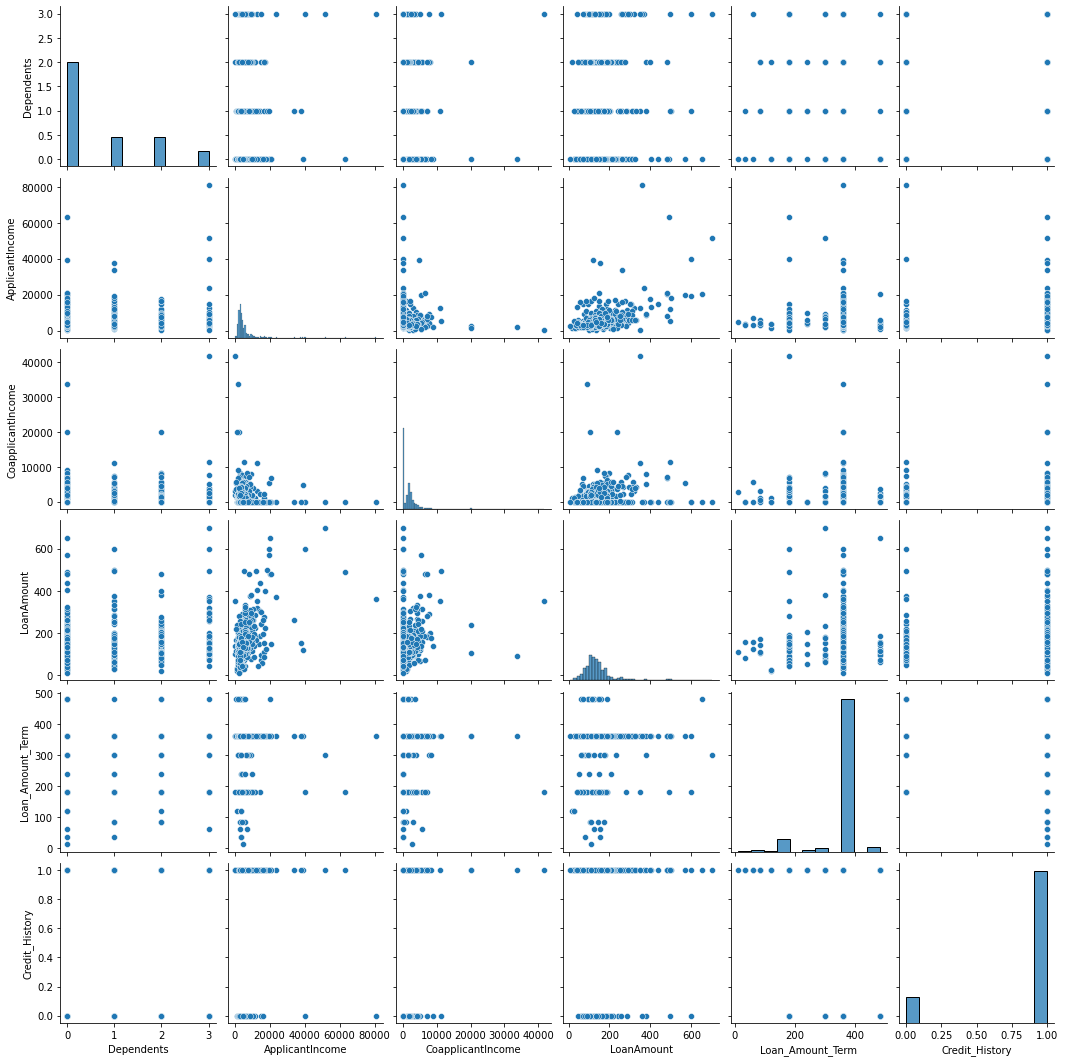

In [111]:
sns.pairplot(df)

### Get All Correlation Coefficients

In [112]:
df.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118202,0.030430,0.163106,-0.103864,-0.040160
ApplicantIncome,0.118202,1.000000,-0.116605,0.565620,-0.046531,-0.018615
CoapplicantIncome,0.030430,-0.116605,1.000000,0.187828,-0.059383,0.011134
LoanAmount,0.163106,0.565620,0.187828,1.000000,0.036475,-0.001431
Loan_Amount_Term,-0.103864,-0.046531,-0.059383,0.036475,1.000000,-0.004705
Credit_History,-0.040160,-0.018615,0.011134,-0.001431,-0.004705,1.000000


<AxesSubplot:>

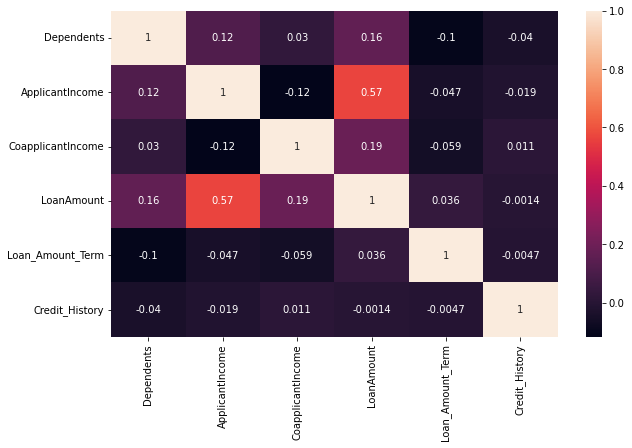

In [113]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(),ax=ax, annot=True)

<AxesSubplot:>

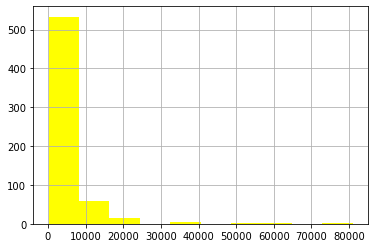

In [114]:
df["ApplicantIncome"].hist(color="yellow")

#### ApplicantIncome is the most around 0 to 8000.

<AxesSubplot:>

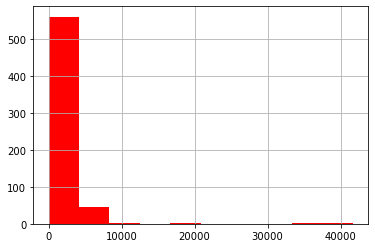

In [115]:
df["CoapplicantIncome"].hist(color="red")

#### Making new column named TotalIncome

In [116]:
df["TotalIncome"]=(df["ApplicantIncome"]+df["CoapplicantIncome"])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0


In [117]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

## Dropping columns ApplicantIncome,CoapplicantIncome

In [118]:
df.drop(["ApplicantIncome"],axis=1,inplace=True)
df.drop(["CoapplicantIncome"],axis=1,inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0.0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0.0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0


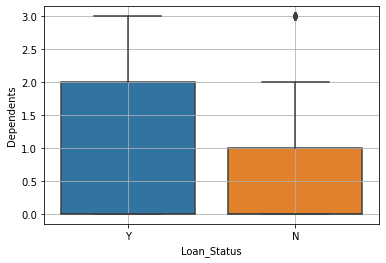

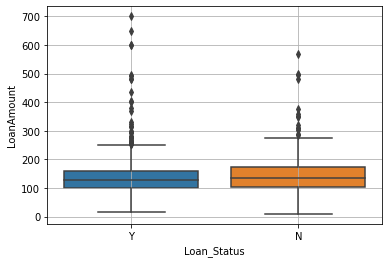

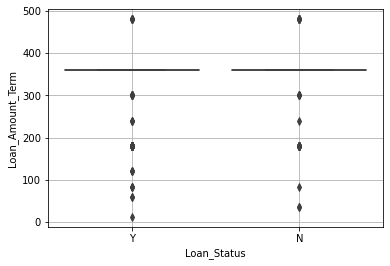

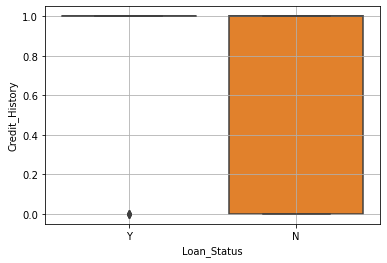

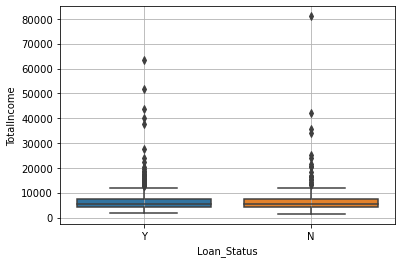

In [119]:
col=df.select_dtypes("float64","int64").columns
for i in df[col]:
    sns.boxplot(data=df,x="Loan_Status",y=df[i])
    plt.grid()
    plt.show()

<AxesSubplot:ylabel='Loan_Status'>

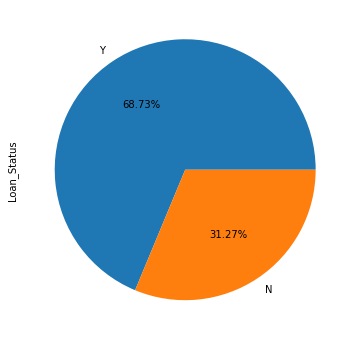

In [120]:
df["Loan_Status"].value_counts().plot(figsize=(6,6),kind='pie',autopct="%.2f%%")

#### We can see from the following pie chart that YES has higher count than NO .That means our model will be trained more on YES than NO. In short more people are taking loan.

## Number of people eligible for loan based on gender

In [121]:
df["Gender"].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

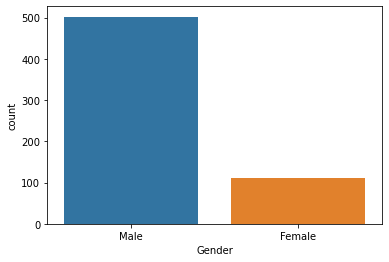

In [122]:
sns.countplot(df["Gender"])

#### Males are taking more loan(their count is around 394) than Females(count is 86)

## Checking the loan status based on marital status

In [123]:
df["Married"].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

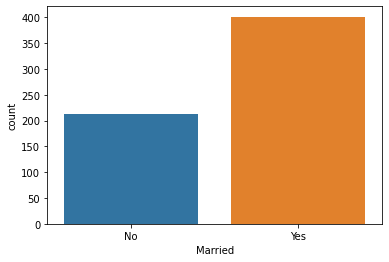

In [124]:
sns.countplot(df["Married"])

#### The Married people are taking loan more than unmarried people.

## Checking the loan status based on education

In [125]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

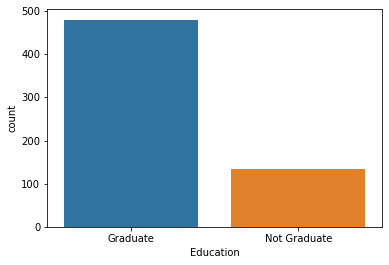

In [126]:
sns.countplot(df["Education"])

#### Graduates taking loan more than not graduates.

## Data encoding

In [137]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]]=oe.fit_transform(df[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]])

In [128]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1.0,0.0,0.0,0.0,0.0,146.412162,360.0,1.0,2.0,1.0,5849.0
1,LP001003,1.0,1.0,1.0,0.0,0.0,128.000000,360.0,1.0,0.0,0.0,6091.0
2,LP001005,1.0,1.0,0.0,0.0,1.0,66.000000,360.0,1.0,2.0,1.0,3000.0
3,LP001006,1.0,1.0,0.0,1.0,0.0,120.000000,360.0,1.0,2.0,1.0,4941.0
4,LP001008,1.0,0.0,0.0,0.0,0.0,141.000000,360.0,1.0,2.0,1.0,6000.0


<AxesSubplot:>

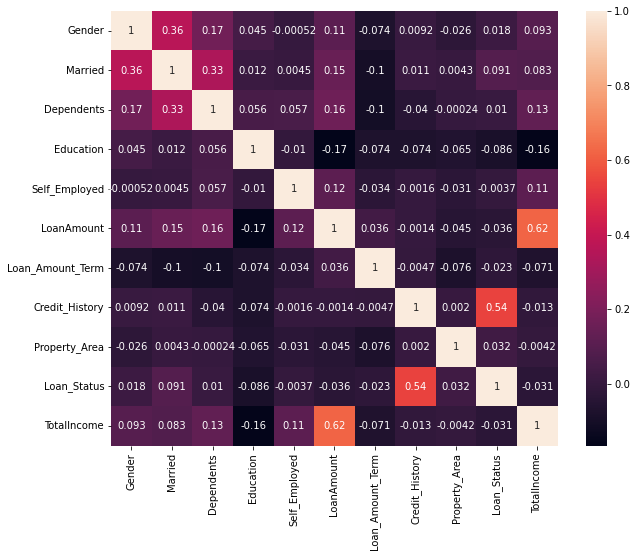

In [129]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [130]:
df.drop("Loan_ID",axis=1,inplace=True)

#### credit history is more correlated with target column. Education,Self_Employed,TotalIncome are negatively correlated.

## Feature and target

In [131]:
feature=df.drop("Loan_Status",axis=1)
feature.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1.0,0.0,0.0,0.0,0.0,146.412162,360.0,1.0,2.0,5849.0
1,1.0,1.0,1.0,0.0,0.0,128.000000,360.0,1.0,0.0,6091.0
2,1.0,1.0,0.0,0.0,1.0,66.000000,360.0,1.0,2.0,3000.0
3,1.0,1.0,0.0,1.0,0.0,120.000000,360.0,1.0,2.0,4941.0
4,1.0,0.0,0.0,0.0,0.0,141.000000,360.0,1.0,2.0,6000.0


In [132]:
target=df.iloc[:,-2]
target.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

## Train test split

In [133]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(feature,target,test_size=0.3,random_state=0)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(429, 10)
(185, 10)
(429,)
(185,)


In [134]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('ordinal_encoder', OrdinalEncoder()),
    ('knn',KNeighborsClassifier())
])

## Model

In [43]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    
    print(f"Training score: {train}\nTesting score: {test}")
    print(f"\nAccuracy: ",accuracy_score(ytest,ypred))
    print(f"\nClassification report: \n",classification_report(ytest,ypred))
    
    
    return model

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

In [45]:
knn=mymodel(KNeighborsClassifier())

Training score: 0.7365967365967366
Testing score: 0.5891891891891892

Accuracy:  0.5891891891891892

Classification report: 
               precision    recall  f1-score   support

         0.0       0.18      0.14      0.16        51
         1.0       0.70      0.76      0.73       134

    accuracy                           0.59       185
   macro avg       0.44      0.45      0.44       185
weighted avg       0.56      0.59      0.57       185



#### This is the case of Ovefitting

## Hyperparameter tuning

In [46]:
trainac=[]
testac=[]


for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    
    train=knn.score(xtrain,ytrain)
    test=knn.score(xtest,ytest)
    
    trainac.append(train)
    testac.append(test)

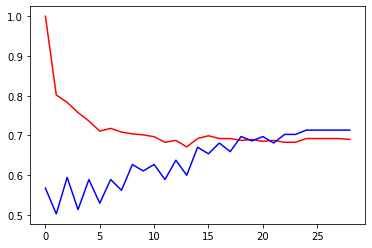

In [47]:
plt.plot(trainac,color="red")
plt.plot(testac,color="blue")

#### K= 17

In [48]:
knn=mymodel(KNeighborsClassifier(n_neighbors=17))
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

Training score: 0.6923076923076923
Testing score: 0.6810810810810811

Accuracy:  0.6810810810810811

Classification report: 
               precision    recall  f1-score   support

         0.0       0.21      0.06      0.09        51
         1.0       0.72      0.92      0.81       134

    accuracy                           0.68       185
   macro avg       0.47      0.49      0.45       185
weighted avg       0.58      0.68      0.61       185



#### Testing score and training score are almost equal after tuning.

In [49]:
lr=mymodel(LogisticRegression())

Training score: 0.7995337995337995
Testing score: 0.827027027027027

Accuracy:  0.827027027027027

Classification report: 
               precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



#### this is the case of Underfitting

In [50]:
dt=mymodel(DecisionTreeClassifier())

Training score: 1.0
Testing score: 0.6756756756756757

Accuracy:  0.6756756756756757

Classification report: 
               precision    recall  f1-score   support

         0.0       0.43      0.57      0.49        51
         1.0       0.81      0.72      0.76       134

    accuracy                           0.68       185
   macro avg       0.62      0.64      0.63       185
weighted avg       0.71      0.68      0.69       185



#### This is the case of Overfitting

## Imblearn Random over sampler

In [51]:
df["Loan_Status"].value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

#### The data is too imbalanced therefore we are applying imbalance learn random over samppler The number yes (1) is very big than that of no's(0),this will affect our precision and F1 score,scoreso we will use imbalance learn to balance the data

In [52]:
!pip install imbalanced-learn 

Defaulting to user installation because normal site-packages is not writeable


In [53]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()

In [54]:
x_label,y_label=ros.fit_resample(xtrain,ytrain)

In [55]:
y_label.value_counts()

0.0    288
1.0    288
Name: Loan_Status, dtype: int64

#### now the number of Yes and No is equal.

In [56]:
def mm(model):
    model.fit(x_label,y_label)
    ypred=model.predict(xtest)
    
    tr=model.score(x_label,y_label)
    te=model.score(xtest,ytest)
    
    print(f"Training score: {tr}\nTesting score: {te}")
    print(f"\nAccuracy score:",accuracy_score(ytest,ypred))
    
    print(f"\nClassification report: \n",classification_report(ytest,ypred))
    
    return model

In [57]:
dt=mm(DecisionTreeClassifier())

Training score: 1.0
Testing score: 0.6648648648648648

Accuracy score: 0.6648648648648648

Classification report: 
               precision    recall  f1-score   support

         0.0       0.42      0.57      0.48        51
         1.0       0.81      0.70      0.75       134

    accuracy                           0.66       185
   macro avg       0.62      0.64      0.62       185
weighted avg       0.70      0.66      0.68       185



#### This is the case overfitting



In [58]:
knn=mm(KNeighborsClassifier())

Training score: 0.7725694444444444
Testing score: 0.4648648648648649

Accuracy score: 0.4648648648648649

Classification report: 
               precision    recall  f1-score   support

         0.0       0.25      0.47      0.33        51
         1.0       0.70      0.46      0.56       134

    accuracy                           0.46       185
   macro avg       0.47      0.47      0.44       185
weighted avg       0.57      0.46      0.49       185



#### This is the case of Overfitting

In [59]:
trac=[]
teac=[]


for i in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_label,y_label)
    
    tr=knn.score(x_label,y_label)
    te=knn.score(xtest,ytest)
    
    trac.append(tr)
    teac.append(te)

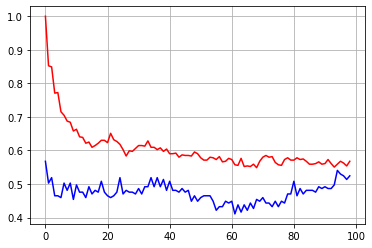

In [60]:
plt.plot(trac,color="red")
plt.plot(teac,color="blue")
plt.grid()

#### k=97

In [61]:
knns=mm(KNeighborsClassifier(n_neighbors=97))

Training score: 0.5625
Testing score: 0.5243243243243243

Accuracy score: 0.5243243243243243

Classification report: 
               precision    recall  f1-score   support

         0.0       0.28      0.45      0.34        51
         1.0       0.73      0.55      0.63       134

    accuracy                           0.52       185
   macro avg       0.50      0.50      0.49       185
weighted avg       0.60      0.52      0.55       185



#### Now the testing and training accuracy is almost same

In [62]:
lr=mm(LogisticRegression())

Training score: 0.6805555555555556
Testing score: 0.7189189189189189

Accuracy score: 0.7189189189189189

Classification report: 
               precision    recall  f1-score   support

         0.0       0.49      0.71      0.58        51
         1.0       0.87      0.72      0.79       134

    accuracy                           0.72       185
   macro avg       0.68      0.71      0.68       185
weighted avg       0.76      0.72      0.73       185



#### This is the case of underfitting

## Standard Scaler after imblearn

In [63]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [64]:
df.iloc[:,:-1]=ss.fit_transform(df.iloc[:,:-1])

In [65]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.000000,0.273231,0.411733,1.223298,0.674519,5849.0
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.219273,0.273231,0.411733,-1.318513,-1.482537,6091.0


In [66]:
lr=mm(LogisticRegression())

Training score: 0.6805555555555556
Testing score: 0.7189189189189189

Accuracy score: 0.7189189189189189

Classification report: 
               precision    recall  f1-score   support

         0.0       0.49      0.71      0.58        51
         1.0       0.87      0.72      0.79       134

    accuracy                           0.72       185
   macro avg       0.68      0.71      0.68       185
weighted avg       0.76      0.72      0.73       185



In [67]:
knn=mm(KNeighborsClassifier())

Training score: 0.7725694444444444
Testing score: 0.4648648648648649

Accuracy score: 0.4648648648648649

Classification report: 
               precision    recall  f1-score   support

         0.0       0.25      0.47      0.33        51
         1.0       0.70      0.46      0.56       134

    accuracy                           0.46       185
   macro avg       0.47      0.47      0.44       185
weighted avg       0.57      0.46      0.49       185



In [68]:
trac=[]
teac=[]


for i in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_label,y_label)
    
    tr=knn.score(x_label,y_label)
    te=knn.score(xtest,ytest)
    
    trac.append(tr)
    teac.append(te)

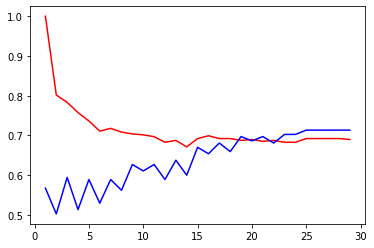

In [69]:
plt.plot(range(1,30),trainac,color="red")
plt.plot(range(1,30),testac,color="blue")

In [70]:
knss=mm(KNeighborsClassifier(n_neighbors=15))

Training score: 0.625
Testing score: 0.4918918918918919

Accuracy score: 0.4918918918918919

Classification report: 
               precision    recall  f1-score   support

         0.0       0.26      0.45      0.33        51
         1.0       0.71      0.51      0.59       134

    accuracy                           0.49       185
   macro avg       0.48      0.48      0.46       185
weighted avg       0.58      0.49      0.52       185



In [71]:
dt=mm(DecisionTreeClassifier())

Training score: 1.0
Testing score: 0.654054054054054

Accuracy score: 0.654054054054054

Classification report: 
               precision    recall  f1-score   support

         0.0       0.41      0.57      0.48        51
         1.0       0.81      0.69      0.74       134

    accuracy                           0.65       185
   macro avg       0.61      0.63      0.61       185
weighted avg       0.70      0.65      0.67       185



## New Obseravations

In [72]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.000000,0.273231,0.411733,1.223298,0.674519,5849.0
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.219273,0.273231,0.411733,-1.318513,-1.482537,6091.0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.957641,0.273231,0.411733,1.223298,0.674519,3000.0
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.314547,0.273231,0.411733,1.223298,0.674519,4941.0
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,-0.064454,0.273231,0.411733,1.223298,0.674519,6000.0


In [150]:
def loanpredict():
    Education=(input("enter Education :-"))
    Gender=(input("Enter a Gender:-"))
    Married=(input("enter a Married:-"))
    Self_Employed=(input("enter a self_employe:-"))
    LoanAmount=int(input("enter a Loan amount:-"))
    Property_Area=(input("enter a property area:-"))
    
    
    newob=[Gender,Married,Education,Self_Employed,Property_Area,LoanAmount]
    y=lr.predict([newob])
    if y==1:
        print(f" Loan is status Approrval")
    else:
        print(f" Loan is does not Approrval")
    return y

In [ ]:
loanpredict()

## Conclusion
Credit_History is a very important variable because of its high correlation with Loan_Status therefor showind high Dependancy for the latter.
The Logistic Regression algorithm is the most accurate: approximately 83%.